## LOADING LIBRARIES

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import numpy as np
#import torch
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import torch.nn as nn
from torchvision import datasets, transforms
import torch.utils
from torch import optim
from torchvision.transforms import ToTensor
import torch
import time
torch.manual_seed(45)


In [4]:
import torch
from new_plot import *

In [5]:
pwd

'/Users/sajid/Desktop/APL745_lab1_2021CEZ8288'



## LOAD _ DATA

In [6]:
# from google.colab import files
# uploaded = files.upload()

data  = pd.read_csv('/Users/sajid/Desktop/APL745_lab1_2021CEZ8288/146_ele.csv')

In [7]:
#data.insert(15,'Angle',(torch.pi/180)*136)

In [8]:
data

,Al,B,Ba,Ca,Cs,Fe,K,Li,Mg,N,Na,O,Si,Ti,Y,LOAD,HARDNESS
0,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,0.246711,7.236131
1,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,0.490764,6.622116
2,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,0.957125,6.449424
3,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,1.957504,6.134908
4,3.508772,7.017544,7.017544,8.771930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,0.253262,7.579451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871,1.962000,9.073894
142,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871,2.943000,8.977580
143,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871,4.905000,8.804966
144,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871,9.810000,8.710215


In [9]:
##data1 = pd.read_csv('/Users/sajid/Desktop/DATA/Daniel_dataset_Final.csv')

In [10]:

#data.shape

In [11]:
# x = data.iloc[:,:-1]
# y= data.iloc[:,-1]

In [12]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler().fit(x_train)
# X_train=scaler.transform(x_train)
# X_test=scaler.transform(x_test)

In [13]:
from math import floor
# data = torch.Tensor(pd.read_csv('/Users/sajid/Desktop/APL745_lab1_2021CEZ8288/146_ele.csv').values)
# XX = data[:, :-1]

# X = (XX - XX.min() ) / ( XX.max() - XX.min())
# #X = X - X.min(0)[0]
# # X = 2 * (X / X.max(0)[0]) - 1
# yy = data[:, -1]
# y = (yy - yy.min() ) / ( yy.max() - yy.min())

In [14]:
data = torch.Tensor(data.values)

In [15]:
#data = data[:20,:]

In [16]:
max_d = data.max(0).values
min_d = data.min(0).values
#data1 = (data-min_d)/(max_d-min_d)
data1 = data/max_d

In [17]:
data1.shape
X = data1[:, :-1]
y=data1[:, -1]

In [18]:
#data = torch.Tensor(data1.values)
# max_d = data.max(0).values
# min_d = data.min(0).values
# data = data/max_d

# X = data1[:, :-1]
# y=data1[:, -1]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
train_x = x_train[:,:-1]
test_x = x_test[:,:-1]
pp1 = x_train[:, -1]
pp2 = x_test[:, -1]

In [21]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
print(pp1.shape)

torch.Size([116, 15])
torch.Size([30, 15])
torch.Size([116])
torch.Size([30])
torch.Size([116])


## Forward Pass

In [22]:
#Defining Model

## Forward Pass
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):

        super(NeuralNetwork, self).__init__()
        self.relu = nn.ReLU()
        #self.sigm = nn.Sigmoid()
        #self.LeakyReLU = nn.LeakyReLU()
        #self.ELU = nn.ELU()
        #self.tan = nn.Tanh()
        self.lin1 = nn.Linear(input_size, hidden1_size)
        self.lin2 = nn.Linear(hidden1_size, hidden2_size)
        self.lin3 = nn.Linear(hidden2_size, output_size)
        self.Dropout = nn.Dropout(p=0.1)
        #self.c1 = nn.Parameter(torch.randn(1),requires_grad=True)
        #self.c2 = nn.Parameter(torch.randn(1),requires_grad=True)
        
    def forward(self, x):

        out = self.lin1(x)
        #print(out.shape)
        out = self.Dropout(out)
        out = self.relu(out)
        out = self.lin2(out)
        out = self.Dropout(out)
        out = self.relu(out)
        out = self.lin3(out)
        #out = torch.square(out)
        
 

        return out
    
#     def loss(self,y_pred, y_true,p):
#         data_loss = (y_pred - y_true)**(2)
#         t1 = (self.c1/(2*p)) + self.c2
#         t2 = torch.sqrt(self.c1**2 + (4* self.c1*self.c2))/ (2*p)
#         physics_loss = (y_true - (t1+ t2))**2

#         return  data_loss + physics_loss 

    #y_pred = c1/(2*p) + c2 +torch.sqrt(c1**2 + 4*c1*c2*p)/(2*p)
    
    #from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    def loss(self,y_pred, y_true):
        return torch.div(((y_pred - y_true)**2).sum(0),len(y_pred))

    


In [23]:
input = 15 # (38*11)
h1 = 5     #5
h2 = 8   # 8
output =2   # (11*1)
model = NeuralNetwork(input, h1, h2, output)


## Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.000901 , weight_decay = 1e-5
                            )  ## lr = 0.001
#optimizer = torch.optim.SGD(model.parameters(), lr=0.0004 , weight_decay = 1e-5)  ## lr = 0.001

print(model)

NeuralNetwork(
  (relu): ReLU()
  (lin1): Linear(in_features=15, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=8, bias=True)
  (lin3): Linear(in_features=8, out_features=2, bias=True)
  (Dropout): Dropout(p=0.1, inplace=False)
)


In [24]:
# X_train = torch.tensor(x_train.iloc[:,:-1].to_numpy(), dtype = torch.float32 ,requires_grad=True)
# Y_train = torch.tensor(y_train.to_numpy() ,dtype = torch.float32 ,requires_grad=True)
# X_test = torch.tensor(x_test.iloc[:,:-1].to_numpy(), dtype = torch.float32,requires_grad=True)
# Y_test = torch.tensor(y_test.to_numpy() ,dtype = torch.float32,requires_grad=True)

In [25]:
# pp1 = torch.tensor(x_train.iloc[:,-1].to_numpy(), dtype = torch.float32 ,requires_grad=True)
# pp2 = torch.tensor(x_test.iloc[:,-1].to_numpy(), dtype = torch.float32 ,requires_grad=True)

## Model Training

In [26]:
## Backpropogation
torch.manual_seed(45)
num_epochs = 23000
ntrain = 116
ntest = 30
ep_train_loss = []
ep_test_loss = []
tt = []
y_pred = []
# Train the model

for epoch in range(num_epochs):
    t1 = time.time()
    train_loss =0
    c =0
    
#     for x,y in zip(X_train, Y_train):
    x,y = train_x, train_y
    optimizer.zero_grad()
    p = pp1               
    
    
    var = model(x)
    var = torch.square(var)
    
    
#    print(var)
    t1 = torch.div(var[:,0],2*p)
    t2 = var[:,1]
    t3 = var[:,0]**2 + 4*var[:,0]*var[:,1]*p
    t4 = torch.div(torch.sqrt(t3) , 2*p)
    y_pred = t1+t2+t3+t4   # var[0] = c1. var[1] = c2

#     print(y_pred.shape, y.shape)
#     break

    loss1 = model.loss(y_pred, y)
#     c+=1
#    print(y_pred.shape)
#    print('loss',loss1)
    loss1.backward()
    optimizer.step()
    #print('loss',loss1)
    ep_train_loss.append(loss1.item())
    
    model.eval()
#     #print(f"Train_Loss {epoch}:", ep_train_loss[-1])


## Test Model
# #In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        #for x,y in zip(X_test,Y_test):
        x,y = test_x, test_y   
        p = pp2

        var = model(x)
        var = torch.square(var)

        t1 = torch.div(var[:,0],2*p)
        #     t1 = var[:,0]**2/(2*p)
        t2 = var[:,1]
        t3 = var[:,0]**2 + 4*var[:,0]*var[:,1]*p
        t4 = torch.sqrt(t3)/(2*p)
        y_pred = t1+t2+t3+t4   # var[0] = c1. var[1] = c2  # var[0] = c1. var[1] = c2

    #         print(y_pred)
        loss2 = model.loss(y_pred, y)
#             c+=1
#             test_loss += loss.item()

#         t2 = time.time()

#         tt.append(t2-t1)

        ep_test_loss.append(loss2.item())
        print("Train_Loss :", loss1, "Test_Loss:" ,loss2 )

# z = sum(tt)
# print(f'total time {z}' )   

Train_Loss : tensor(2.9748, grad_fn=<DivBackward0>) Test_Loss: tensor(1.0092)
Train_Loss : tensor(1.2889, grad_fn=<DivBackward0>) Test_Loss: tensor(0.8427)
Train_Loss : tensor(1.1088, grad_fn=<DivBackward0>) Test_Loss: tensor(0.7002)
Train_Loss : tensor(0.9509, grad_fn=<DivBackward0>) Test_Loss: tensor(0.5798)
Train_Loss : tensor(0.8144, grad_fn=<DivBackward0>) Test_Loss: tensor(0.4794)
Train_Loss : tensor(0.6979, grad_fn=<DivBackward0>) Test_Loss: tensor(0.3969)
Train_Loss : tensor(0.5995, grad_fn=<DivBackward0>) Test_Loss: tensor(0.3301)
Train_Loss : tensor(0.5174, grad_fn=<DivBackward0>) Test_Loss: tensor(0.2768)
Train_Loss : tensor(0.4497, grad_fn=<DivBackward0>) Test_Loss: tensor(0.2351)
Train_Loss : tensor(0.3945, grad_fn=<DivBackward0>) Test_Loss: tensor(0.2029)
Train_Loss : tensor(0.3499, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1784)
Train_Loss : tensor(0.3143, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1606)
Train_Loss : tensor(0.2863, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0997, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1341)
Train_Loss : tensor(0.0988, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1336)
Train_Loss : tensor(0.0978, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1331)
Train_Loss : tensor(0.0969, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1326)
Train_Loss : tensor(0.0960, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1321)
Train_Loss : tensor(0.0951, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1316)
Train_Loss : tensor(0.0941, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1311)
Train_Loss : tensor(0.0932, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1306)
Train_Loss : tensor(0.0923, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1301)
Train_Loss : tensor(0.0914, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1296)
Train_Loss : tensor(0.0905, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1291)
Train_Loss : tensor(0.0897, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1286)
Train_Loss : tensor(0.0888, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0312, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0460)
Train_Loss : tensor(0.0309, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0457)
Train_Loss : tensor(0.0306, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0453)
Train_Loss : tensor(0.0303, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0449)
Train_Loss : tensor(0.0300, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0445)
Train_Loss : tensor(0.0297, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0441)
Train_Loss : tensor(0.0294, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0438)
Train_Loss : tensor(0.0291, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0434)
Train_Loss : tensor(0.0288, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0430)
Train_Loss : tensor(0.0285, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0427)
Train_Loss : tensor(0.0282, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0423)
Train_Loss : tensor(0.0279, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0420)
Train_Loss : tensor(0.0276, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0092, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0212)
Train_Loss : tensor(0.0091, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0209)
Train_Loss : tensor(0.0091, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0205)
Train_Loss : tensor(0.0090, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0201)
Train_Loss : tensor(0.0089, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0198)
Train_Loss : tensor(0.0089, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0194)
Train_Loss : tensor(0.0088, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0191)
Train_Loss : tensor(0.0087, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0187)
Train_Loss : tensor(0.0087, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0184)
Train_Loss : tensor(0.0086, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0181)
Train_Loss : tensor(0.0085, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0179)
Train_Loss : tensor(0.0085, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0176)
Train_Loss : tensor(0.0084, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0048, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0111)
Train_Loss : tensor(0.0048, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0111)
Train_Loss : tensor(0.0048, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0110)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0110)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0109)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0109)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0109)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0108)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0108)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0107)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0107)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0106)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0073)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0073)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0073)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0073)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0073)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0072)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0072)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0072)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0072)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0072)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0071)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0071)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0056)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0056)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0043)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0043)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0043)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0043)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

## PLOTTING

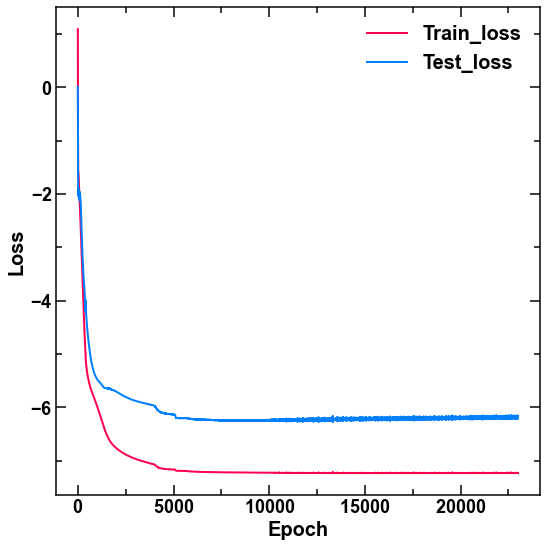

In [27]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
epoch = [i for i in range(num_epochs)]
fig, ax = plt.subplots(figsize=[8,8])
#plt.subplot(121)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.plot(epoch,np.log(ep_train_loss) , color = "#FF004F")
ax.plot(epoch,np.log(ep_test_loss), color = '#007FFF')
ax.legend(["Train_loss", "Test_loss"], loc='upper right')
plt.tight_layout()
plt.savefig('loss.tif',format='tif', dpi=300)
plt.show()

In [28]:
#model = model.eval()

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def get_score(base='Training', actual=0,predicted=0):
    r2 = r2_score(actual,predicted)
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    print(base,r2.round(3),mae.round(3),mse.round(3))
    return r2,mae,mse

In [30]:
def pred_const(example):
    return (torch.square(model(example)))

In [31]:
#pred_const(test_x)

In [32]:
def pred_hard(example,p):
    t1 = torch.div(pred_const(example)[:,0],2*p)
    t2 = pred_const(example)[:,1]
    t3 = pred_const(example)[:,0]**2 + 4*pred_const(example)[:,0]*pred_const(example)[:,1]*p
    t4 = torch.div(torch.sqrt(t3) , 2*p)
    return t1+t2+t3+t4 
    

In [33]:
get_score('Training:',actual=train_y.detach().numpy(),predicted=pred_hard(train_x,pp1).detach().numpy())
get_score('Test :',actual=test_y.detach().numpy(),predicted=pred_hard(test_x,pp2).detach().numpy())

Training: 0.979 0.016 0.001
Test : 0.948 0.029 0.002


(0.9479548086847105, 0.028738953, 0.002054494)

In [34]:
const = pred_const(test_x)

In [35]:
c1 = const[:,0]
c2 = const[:,1]

In [36]:
#renorm_pred_hard(test_x,pp2)

In [37]:
c1

tensor([2.0268e-04, 1.4255e-04, 6.1484e-04, 1.6090e-04, 2.0268e-04, 9.2103e-05,
        6.1484e-04, 4.6467e-04, 3.1004e-04, 1.6090e-04, 3.0002e-04, 9.2950e-06,
        3.8325e-04, 4.6467e-04, 2.6435e-04, 5.4297e-04, 1.2584e-04, 2.6435e-04,
        8.9566e-04, 1.2584e-04, 1.4255e-04, 9.2103e-05, 3.0002e-04, 3.1004e-04,
        8.9566e-04, 1.3953e-04, 3.1004e-04, 1.4255e-04, 9.2950e-06, 3.0002e-04],
       grad_fn=<SelectBackward0>)

In [38]:

alpha = torch.FloatTensor(torch.linspace(45,180, 20))
torch.deg2rad(alpha)
#alpha = torch.FloatTensor([100*(torch.pi/180), 120*(torch.pi/180), 136*(torch.pi/180)])
#alpha = torch.deg2red(a)

tensor([0.7854, 0.9094, 1.0334, 1.1574, 1.2814, 1.4054, 1.5295, 1.6535, 1.7775,
        1.9015, 2.0255, 2.1495, 2.2735, 2.3975, 2.5215, 2.6456, 2.7696, 2.8936,
        3.0176, 3.1416])

In [39]:
b = torch.sin(torch.deg2rad(alpha)/2)

In [40]:
c = c1[:5]

In [41]:
c

tensor([0.0002, 0.0001, 0.0006, 0.0002, 0.0002], grad_fn=<SliceBackward0>)

(35.0, 190.0)

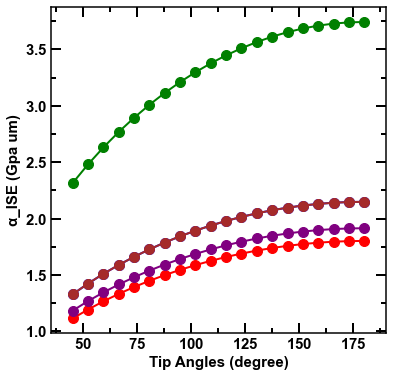

In [42]:
for i in range(0,c.shape[0]):
    xx = 31.62*torch.sqrt(2*b*c[i]*max_d[-1])
    #plt.scatter(alpha,(xx).detach().numpy())
    plt.plot(alpha,(xx).detach().numpy(),'-o')
plt.xlabel('Tip Angles (degree)', fontsize = 15)
plt.ylabel('\u03B1_ISE (Gpa um)',fontsize = 15)
plt.tick_params(which='minor',length=5 ,width=2,labelsize=20, direction ='in')
plt.tick_params(which='major',length=10 , width=2,labelsize=15,direction ='in')
plt.xlim([35,190])

In [43]:
d = c2[:5]

In [44]:
d

tensor([0.2924, 0.4397, 0.1788, 0.5205, 0.2924], grad_fn=<SliceBackward0>)

Text(0, 0.5, 'H∞ (GPa)')

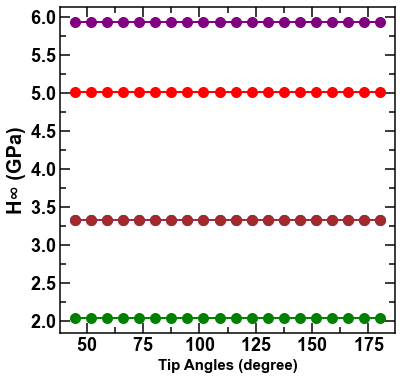

In [45]:
for i in range(0,d.shape[0]):
    aa = torch.ones((20,1)) * d[i].detach().numpy()*max_d[-1]
    plt.plot(alpha,aa, '-o')
plt.xlabel('Tip Angles (degree)', fontsize = 15)
plt.ylabel('H\u221E (GPa)',fontsize = 20)

In [46]:
#[1 'Al',  2'B', 3'Ba', 4'Ca', 5'Cs', 6'Fe', 7'K', 8'Li', 9'Mg', 10'N', 11'Na', 12'O', 13'Si', 14'Ti', 15'Y']

# test_x 
# Al_B-Cs-Li-O
# Na-O-Si-Ti
# Al-B-cs-O
# B-Ba-Ca-Si-O



## SHAP


In [47]:
import shap


In [48]:

data  = pd.read_csv('/Users/sajid/Desktop/APL745_lab1_2021CEZ8288/146_ele.csv')
feature_names = data.columns


In [49]:
feature_names[:-2]

Index(['Al', 'B', 'Ba', 'Ca', 'Cs', 'Fe', 'K', 'Li', 'Mg', 'N', 'Na', 'O',
       'Si', 'Ti', 'Y'],
      dtype='object')

In [98]:
back = train_x

In [99]:
explainer = shap.GradientExplainer(model,back)

In [100]:
shap_values = explainer.shap_values(back)


In [101]:
type(shap_values)

list

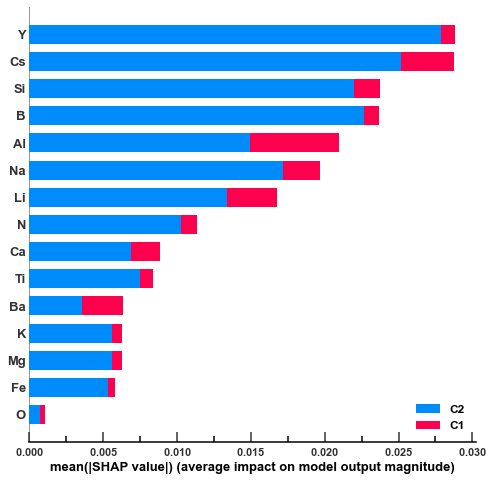

In [102]:
shap.summary_plot(shap_values, show=False, plot_type='bar',feature_names=feature_names[:-2],class_names=['C1', 'C2'],plot_size=[8,8])

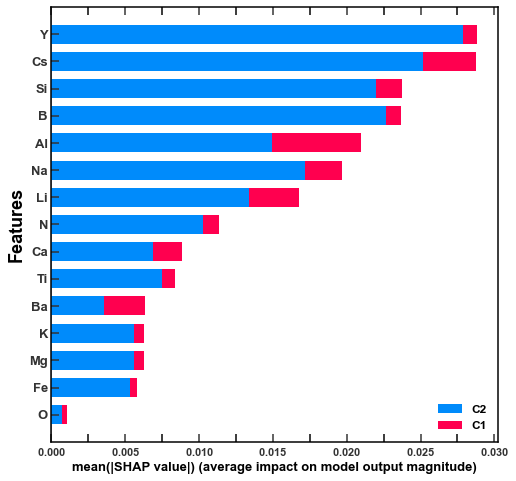

In [103]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, show=False, plot_type='bar',feature_names=feature_names[:-2],class_names=['C1', 'C2'],plot_size=[8,8])
plt.ylabel('Features', fontsize = 18)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
visible_ticks = {
   "top": True,
   "left": True
    
}
plt.tick_params(axis="x", which="both", **visible_ticks, length = 8)
plt.tick_params(axis="y", which="major", **visible_ticks ,length = 8)


In [54]:
#shap_values[1].shape torch.sqrt(a)torch.sin(torch.deg2rad(alpha)/2)

In [55]:
torch.tensor(120)

tensor(120)

In [56]:
torch.sin(torch.deg2rad(torch.tensor(120)/2))

tensor(0.8660)

In [57]:
a_ISE = 2*shap_values[0]*torch.sin(torch.deg2rad(torch.tensor(120)/2)).detach().numpy()

In [58]:
a_ISE

array([[ 0.00596014, -0.00016059, -0.00663126, ...,  0.00041927,
         0.00150599,  0.00233091],
       [-0.01560076,  0.00494695,  0.00057821, ...,  0.00896   ,
         0.00164832,  0.00120412],
       [ 0.01539843,  0.00502674,  0.0023016 , ..., -0.00416002,
         0.00100845,  0.00150423],
       ...,
       [ 0.00847749,  0.0013667 , -0.01440582, ..., -0.00093975,
         0.00267191,  0.00135303],
       [ 0.00421135, -0.0006965 ,  0.00531708, ...,  0.00114125,
        -0.00307303, -0.00071599],
       [ 0.00798324, -0.00091734,  0.00305493, ...,  0.00382295,
         0.0012973 , -0.00042726]])

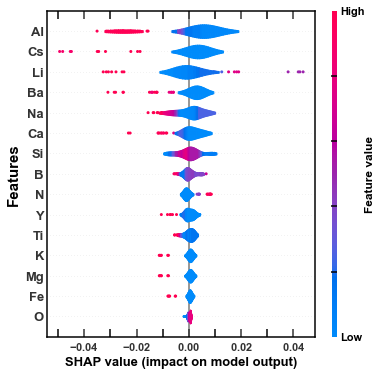

In [59]:
shap.summary_plot(a_ISE, train_x.detach().numpy() , show=False, 
                  plot_type='violin',feature_names=feature_names[:-2],
                 plot_size=[6,6])
plt.ylabel('Features', fontsize = 15)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
#plt.xlim([-0.007, 0.007])
visible_ticks = {
   "top": True,
   
    
}
plt.tick_params(axis="x", which="both", **visible_ticks ,length = 8)
plt.tick_params(axis="y", which="both", **visible_ticks ,length = 8)

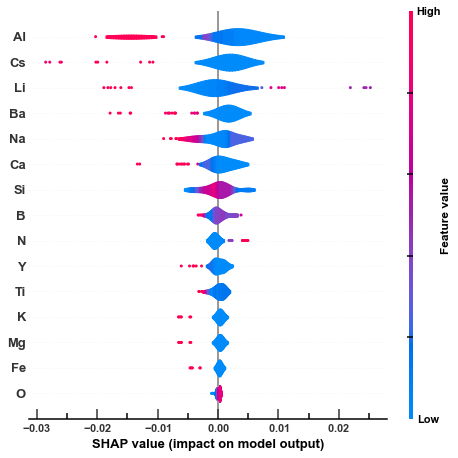

In [60]:
shap.summary_plot(shap_values[0], train_x.detach().numpy() , show=False, plot_type='violin',feature_names=feature_names[:-2])

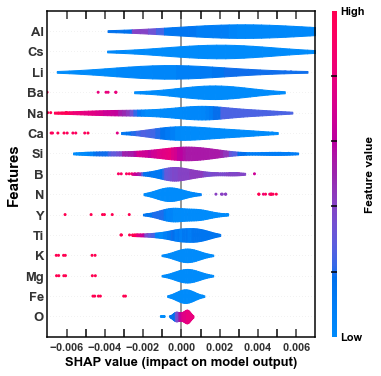

In [61]:


shap.summary_plot(shap_values[0], train_x.detach().numpy() , show=False, 
                  plot_type='violin',feature_names=feature_names[:-2],
                  plot_size=[6,6])
plt.ylabel('Features', fontsize = 15)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.xlim([-0.007, 0.007])
visible_ticks = {
   "top": True,
   
    
}
plt.tick_params(axis="x", which="both", **visible_ticks ,length = 8)
plt.tick_params(axis="y", which="both", **visible_ticks ,length = 8)
#plt.savefig('violinL.tif',format='tif', dpi=300)
#plt.savefig('Shap Plots.png')

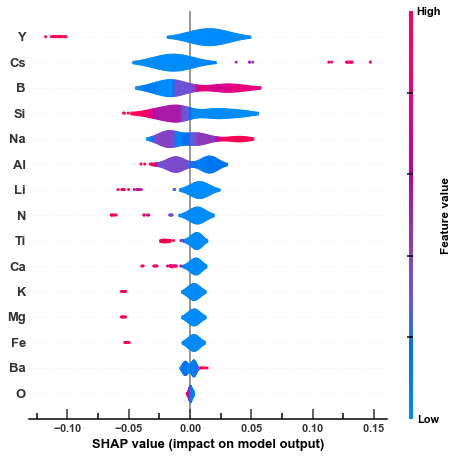

In [62]:
shap.summary_plot(shap_values[1], train_x.detach().numpy(), show=False, plot_type='violin',feature_names=feature_names[:-2])

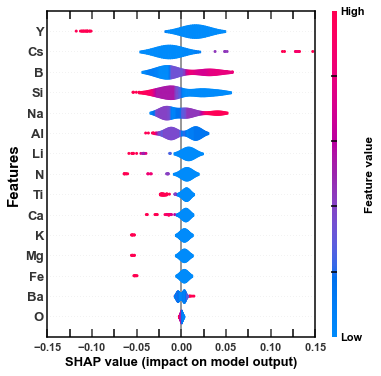

In [63]:


shap.summary_plot(shap_values[1], train_x.detach().numpy() , show=False, 
                  plot_type='violin',feature_names=feature_names[:-2],
                  plot_size=[6,6])
plt.ylabel('Features', fontsize = 15)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.xlim(-0.15, 0.15)
visible_ticks = {
   "top": True,
   
    
}
plt.tick_params(axis="x", which="both", **visible_ticks ,length = 8)
plt.tick_params(axis="y", which="both", **visible_ticks ,length = 8)
#plt.savefig('violinL.tif',format='tif', dpi=300)
#plt.savefig('Shap Plots.png')

In [64]:
f_nam = ['Si', 'B', 'P', 'Ge', 'Te', 'Se', 'Bi', 'Sb','O'] # ne
ll = X_train.columns.to_list()
N = [i for i in range(len(ll)) if ll[i] in f_nam]
# shap.summary_plot(shap_values[:,N], X_train.iloc[:, N])
feature_names1=[f"{name} [{kuchbhi[name][0]}, {kuchbhi[name][1] :.2f}]" for name in X_train.iloc[:, N].columns.tolist()]

NameError: name 'X_train' is not defined

In [ ]:
kuchbhi = {name:j for name,j in zip(colname, res)}

shap.summary_plot(shap_values[:,N], X_train.iloc[:, N],show = False, 
                  plot_type='violin',
                  feature_names=feature_names1,  
                  color=plt.get_cmap("cool")
                  )
plt.ylabel('Features', fontsize = 15)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.xlim(-3, 3)
visible_ticks = {
   "top": True,
   
    
}
plt.tick_params(axis="x", which="both", **visible_ticks)
plt.tick_params(axis="y", which="both", **visible_ticks)

In [147]:
dn = pd.read_csv('NB_100.csv')
dn1 = pd.read_csv('NB_120.csv')
dn2 = pd.read_csv('NB_136.csv')

In [148]:
dn.insert(15,'Angle',(torch.pi/180)*100)
dn1.insert(15,'Angle',(torch.pi/180)*120)
dn2.insert(15,'Angle',(torch.pi/180)*136)

In [149]:
dn

,Al,B,Ba,Ca,Cs,Fe,K,Li,Mg,N,Na,O,Si,Ti,Y,Angle,LOAD,HARDNESS
0,0,33.333333,0,0,0,0,0,0,0,0,11.111111,55.555556,0,0,0,1.745329,0.1,4.277726
1,0,33.333333,0,0,0,0,0,0,0,0,11.111111,55.555556,0,0,0,1.745329,0.2,4.191731
2,0,33.333333,0,0,0,0,0,0,0,0,11.111111,55.555556,0,0,0,1.745329,0.3,4.045312
3,0,33.333333,0,0,0,0,0,0,0,0,11.111111,55.555556,0,0,0,1.745329,0.5,4.016160
4,0,33.333333,0,0,0,0,0,0,0,0,11.111111,55.555556,0,0,0,1.745329,1.0,3.938683
5,0,33.333333,0,0,0,0,0,0,0,0,11.111111,55.555556,0,0,0,1.745329,2.0,3.897152
6,0,33.333333,0,0,0,0,0,0,0,0,11.111111,55.555556,0,0,0,1.745329,5.0,3.910178


In [152]:

dm = torch.Tensor(dn.values)
dm1 = torch.Tensor(dn1.values)
dm2 = torch.Tensor(dn2.values)

In [153]:
dx = dm/max_d
dx1 = dm1/max_d
dx2 = dm2/max_d

In [154]:
new_x = dx[:,:-2]
load = dx[:,-2]
hardness = dx[:, -1]
new_x1 = dx1[:,:-2]
load1= dx1[:,-2]
hardness1 = dx1[:, -1]
new_x2 = dx2[:,:-2]
load2 = dx2[:,-2]
hardness2 = dx2[:, -1]


In [155]:
# H_inf = (pred_const(new_x2)*max_d[-1])[:,1]
# H_inf

In [156]:
renorm_pred_hard(new_x,load)
renorm_pred_hard(new_x1,load1)
renorm_pred_hard(new_x2,load2)

tensor([6.5533, 5.8202, 5.5203, 5.2342, 4.9606, 4.7755, 4.6170],
       grad_fn=<MulBackward0>)

In [157]:
renorm_act_hard(hardness)
renorm_act_hard(hardness1)
renorm_act_hard(hardness2)

tensor([6.9128, 6.3480, 5.6912, 5.0539, 4.5572, 4.1630, 4.0490])

In [158]:
renorm_load(load)
renorm_load(load1)
renorm_load(load2)

tensor([0.1000, 0.2000, 0.3000, 0.5000, 1.0000, 2.0000, 5.0000])

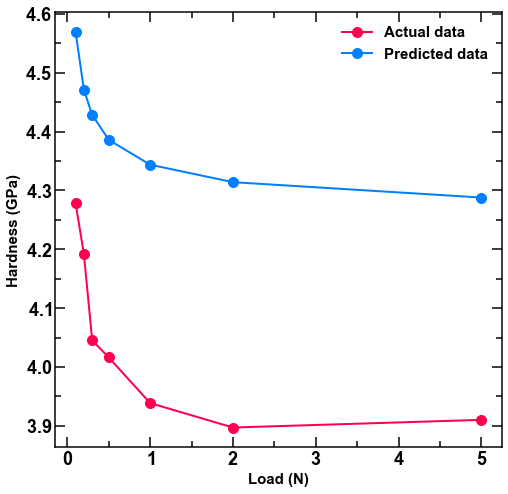

In [141]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
plt.plot(renorm_load(load),renorm_act_hard(hardness),'-o',color ='#FF004F')

plt.plot(renorm_load(load),renorm_pred_hard(new_x,load).detach().numpy(),'-o',color = '#007FFF')


plt.xlabel('Load (N)', fontsize = 15)
plt.ylabel('Hardness (GPa)',fontsize = 15)
plt.legend(["Actual data", "Predicted data", "H_infinity"], loc='upper right', fontsize = 15)


#plt.savefig('NBS.tif',bbox_inches='tight',format='tif', dpi=300, pad_inches = 0)

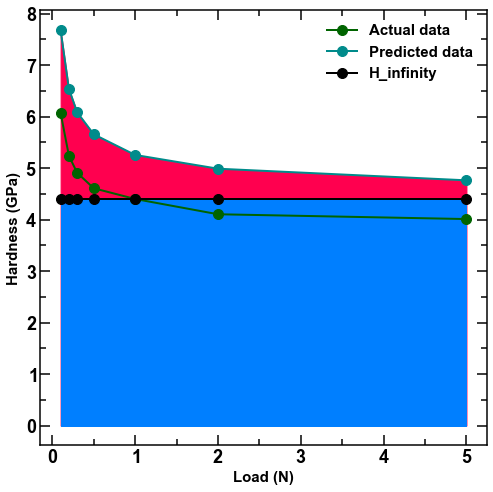

In [328]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

#plt.plot(renorm_load(load),renorm_act_hard(hardness),'-o',color ="darkgreen")
#plt.plot(renorm_load(load1),renorm_act_hard(hardness1),'-o',color ="darkgreen")
plt.plot(renorm_load(load2),renorm_act_hard(hardness2),'-o',color ="darkgreen")

#plt.plot(renorm_load(load),renorm_pred_hard(new_x,load).detach().numpy(),'-o',color = 'darkcyan')

#plt.plot(renorm_load(load1),renorm_pred_hard(new_x1,load1).detach().numpy(),'-o',color = 'darkcyan')

plt.plot(renorm_load(load2),renorm_pred_hard(new_x2,load2).detach().numpy(),'-o',color = 'darkcyan')
plt.plot(renorm_load(load2),H_inf.detach().numpy(),'-o',color = 'black')

plt.xlabel('Load (N)', fontsize = 15)
plt.ylabel('Hardness (GPa)',fontsize = 15)
plt.legend(["Actual data", "Predicted data", "H_infinity"], loc='upper right', fontsize = 15)
plt.fill_between(renorm_load(load2), renorm_pred_hard(new_x2,load2).detach().numpy(), color = '#FF004F')
plt.fill_between(renorm_load(load2), H_inf.detach().numpy(), color = '#007FFF')

plt.savefig('a_ise.tif',bbox_inches='tight',format='tif', dpi=300, pad_inches = 0)

In [154]:
plt.fill_between(x, y1, step="pre", alpha=0.4)
plt.fill_between(x, y2, step="pre", alpha=0.4)

tensor([0.1000, 0.2000, 0.3000, 0.5000, 1.0000, 2.0000, 5.0000])

## A_ISE Plot

In [159]:
constant = pred_const(new_x)*max_d[-1]
constant1 = pred_const(new_x1)*max_d[-1]
constant2 = pred_const(new_x2)*max_d[-1]

In [162]:
constant

tensor([[4.1219e-05, 4.2432e+00],
        [4.1219e-05, 4.2432e+00],
        [4.1219e-05, 4.2432e+00],
        [4.1219e-05, 4.2432e+00],
        [4.1219e-05, 4.2432e+00],
        [4.1219e-05, 4.2432e+00],
        [4.1219e-05, 4.2432e+00]], grad_fn=<MulBackward0>)

In [163]:
con1 = constant[:,0]
con2 = constant[:,1]
con11 = constant1[:,0]
con21 = constant1[:,1]
con12 = constant2[:,0]
con22 = constant2[:,1]

In [164]:
torch.tensor([100,120, 136])

tensor([100, 120, 136])

In [165]:
alpha = torch.tensor([100,120, 136])
torch.deg2rad(alpha)
b = torch.sin(torch.deg2rad(alpha)/2)

In [166]:
max_d[-1]

tensor(11.3904)

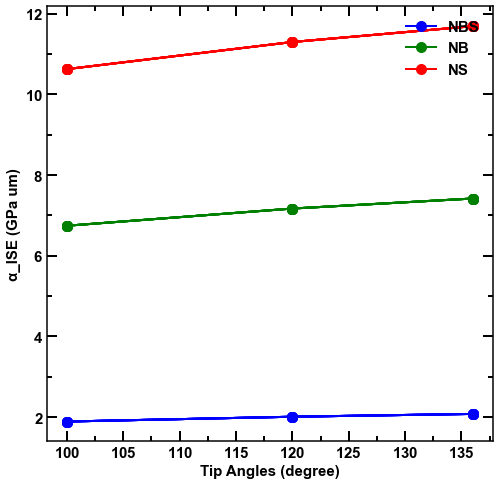

In [167]:
for i in range(0,con1.shape[0]):
    xx = 31.62* torch.sqrt(2*b*con1[i]*max_d[-2])
    xx1 = 31.62*torch.sqrt(2*b*con11[i]*max_d[-2])
    xx2 = 31.62*torch.sqrt(2*b*con12[i]*max_d[-2])
    #plt.scatter(alpha,(xx).detach().numpy())
    plt.plot(alpha,(xx).detach().numpy(),'-o',color = 'blue')
    plt.plot(alpha,(xx1).detach().numpy(),'-o',color = 'green')
    plt.plot(alpha,(xx2).detach().numpy(),'-o',color = 'red')
plt.xlabel('Tip Angles (degree)', fontsize = 15)
plt.ylabel('\u03B1_ISE (GPa um)',fontsize = 15)
plt.legend(["NBS", "NB", "NS"], loc='upper right', fontsize = 15)
plt.tick_params(which='minor',length=5 ,width=2,labelsize=20, direction ='in')
plt.tick_params(which='major',length=10 , width=2,labelsize=15,direction ='in')
#plt.xlim([35,190])

## H_Infinity

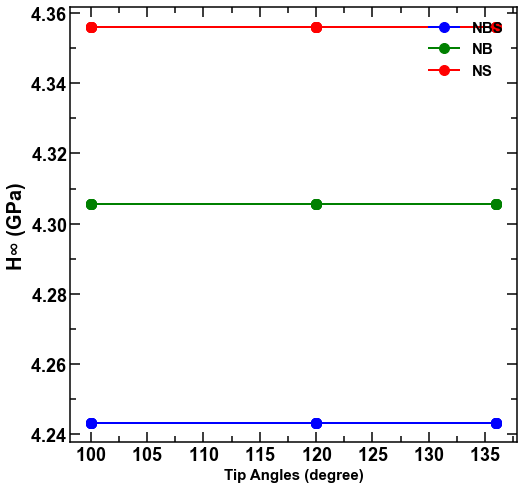

In [168]:
for i in range(0,con2.shape[0]):
    aa = torch.ones((3,1)) * con2[i].detach().numpy()
    aa1 = torch.ones((3,1)) * con21[i].detach().numpy()
    aa2 = torch.ones((3,1)) * con22[i].detach().numpy()
    plt.plot(alpha,aa, '-o',color = 'blue')
    plt.plot(alpha,aa1, '-o',color = 'green')
    plt.plot(alpha,aa2, '-o',color = 'red')
plt.xlabel('Tip Angles (degree)', fontsize = 15)
plt.ylabel('H\u221E (GPa)',fontsize = 20)
plt.legend(["NBS", "NB", "NS"], loc='upper right', fontsize = 15)

## Renormalisation

In [50]:
def renorm_pred_hard(example,p):
    return pred_hard(example,p)*max_d[-1]

In [51]:
def renorm_load(p):
    return p*max_d[-2]

In [52]:
def renorm_act_hard(example):
    return example*max_d[-1]

NameError: name 'pred_hard' is not defined

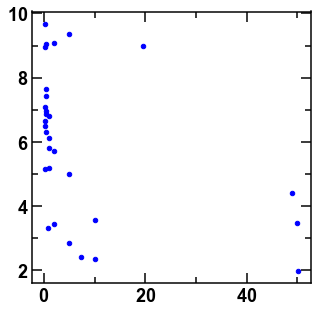

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
plt.scatter(renorm_load(pp2),renorm_act_hard(test_y[:]),s=20)
#plt.plot(renorm_load(pp1),renorm_act_hard(train_y))
plt.scatter(renorm_load(pp2),renorm_pred_hard(test_x,pp2).detach().numpy(), s=20)
plt.xlabel('Load (N)')
plt.ylabel('Hardness (GPa)')

plt.legend(["Actual_data", "Predicted_data"], loc='upper right',frameon=True , bbox_to_anchor=(1, 1))

plt.tick_params(which='minor',length=2,width=2,labelsize=12, direction ='in')
plt.tick_params(which='major',length=8,width=2,labelsize=12,direction ='in')
#plt.xlim([0,5])
plt.show()

In [53]:
y1 = renorm_act_hard(train_y).detach().numpy()
y2 = renorm_pred_hard(train_x,pp1).detach().numpy()

In [54]:
y1_test = renorm_act_hard(test_y).detach().numpy()
y2_test = renorm_pred_hard(test_x,pp2).detach().numpy()

In [55]:
from new_plot import *

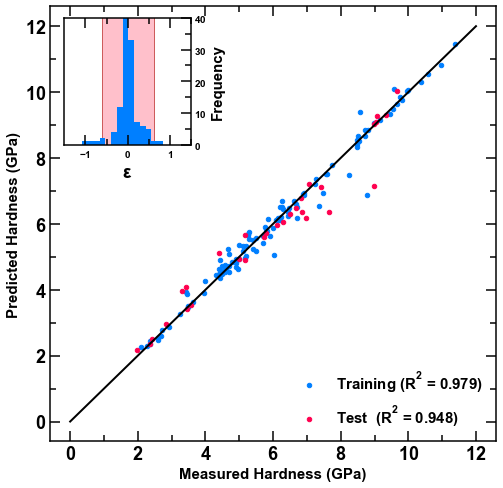

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#plt.figure(figsize=(8,8))
fig,ax1 = plt.subplots(figsize =(8,8))
ax1.scatter(y1,y2, s =20,color =['#007FFF'])
ax1.scatter(y1_test,y2_test, s =20,color =["#FF004F"])


ax1.legend(['Training ($R^2$ = 0.979)','Test  ($R^2$ = 0.948)'], loc = 'lower right',fontsize = 15)
# # Add axis labels
ax1.set_ylabel('Predicted Hardness (GPa)',fontsize = 15)
ax1.set_xlabel('Measured Hardness (GPa)', fontsize = 15)
plt.plot([0, 12], [0, 12],color='black') #label 
left, bottom, width, height = [0.15, 0.64, 0.22, 0.22]
ax2 = fig.add_axes([left, bottom, width, height])
std=np.std(y2-y1)
mean=np.mean(y2-y1)
xx=mean-2*std # 0.21-(2*std)
yy = 0
mean = np.mean(y2-y1)
rec = patches.Rectangle((xx,yy),4*std,45, facecolor ='pink',edgecolor='indianred')
ax2.add_patch(rec)
y,x,__ = plt.hist(y2-y1, bins =20,color=['#007FFF'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_xlim([-1.5,1.5])
xlabel_ax2 = ax2.get_xticklabels()
ax2.yaxis.tick_right()
ax2.yaxis.set_tick_params(labelsize =10)
ax2.xaxis.set_tick_params(labelsize =10)
ax2.set_ylim(0,40)
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Frequency',fontsize=15)
ax2.set_xlabel(r'$\epsilon$',fontsize=18)

plt.savefig('reg.tif',format='tif', dpi=300)
# plt.show()

In [61]:
data

,Al,B,Ba,Ca,Cs,Fe,K,Li,Mg,N,Na,O,Si,Ti,Y,LOAD,HARDNESS
0,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,0.246711,7.236131
1,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,0.490764,6.622116
2,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,0.957125,6.449424
3,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,1.957504,6.134908
4,3.508772,7.017544,7.017544,8.771930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000,0.253262,7.579451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871,1.962000,9.073894
142,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871,2.943000,8.977580
143,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871,4.905000,8.804966
144,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871,9.810000,8.710215


In [ ]:
#ff = pd.DataFrame()
nn = []
for i in colname:
    pp = X_test.loc[:,i].astype(bool).sum(axis=0)
    nn.append(pp)
print(nn)

In [ ]:
## Maximum percentage of element in dataset
mm=[]
for i in colname:
    mm.append(max(X_test[i]))
    #print(max(X_test[i]))


print(mm)

In [ ]:
# Use zip
res = [[i , j] for i, j in zip(nn, mm)]
# Result
print(colname)
print("The concatenated lists: ",res)

In [67]:
X_train=data.iloc[:,:-2]

In [68]:
X_train

,Al,B,Ba,Ca,Cs,Fe,K,Li,Mg,N,Na,O,Si,Ti,Y
0,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
1,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
2,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
3,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
4,3.508772,7.017544,7.017544,8.771930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871
142,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871
143,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871
144,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871


In [70]:
ff = pd.DataFrame(X_train.astype(bool).sum(axis=0).sort_values(ascending=False))
ff3= ff.values.tolist()
ff2 = [ item for elem in ff3 for item in elem]


In [75]:
(data.columns)

Index(['Al', 'B', 'Ba', 'Ca', 'Cs', 'Fe', 'K', 'Li', 'Mg', 'N', 'Na', 'O',
       'Si', 'Ti', 'Y', 'LOAD', 'HARDNESS'],
      dtype='object')

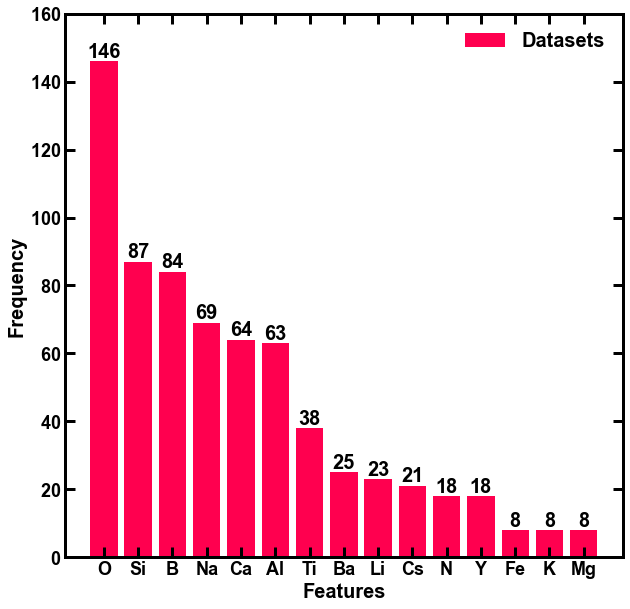

In [83]:
ff1 = []
for i in range(15):
    ff1.append(ff.index[i])
fig, ax = plt.subplots(figsize = (10,10))
plt.setp(ax.spines.values(), linewidth=3)
# plt.figure(figsize=(35,10))

plt.bar(ff1, ff2, color = ["#FF004F"])
plt.minorticks_off()
plt.tick_params(axis="x", which="major", width = 3)
plt.tick_params(axis="y", which="major", width = 3)
for i in range(len(ff2)):
    plt.annotate(str(ff2[i]),xy=(ff1[i],ff2[i]),ha='center', va='bottom')
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.ylim([0,160])
plt.legend(["Datasets"])
plt.savefig('SRIML.png')

No handles with labels found to put in legend.


Text(0.5, 0, '$\\epsilon$')

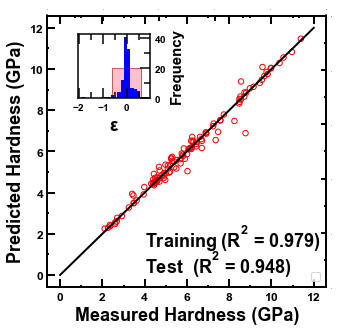

In [130]:
import matplotlib.patches as patches
from matplotlib.pyplot import figure
fig,ax = plt.subplots(figsize =(5,5))
plt.scatter(y1,y2, s =30,facecolor = 'none',edgecolor ='red')
plt.text(x =4.0,y =1.3,s ='Training ($R^2$ = 0.979)',fontsize=18)
plt.text(x =4.0,y =0.04,s ='Test  ($R^2$ = 0.948)',fontsize=18)
plt.plot([0, 12], [0, 12],color='black') #label 
plt.legend(fontsize = 12,frameon =True,loc ='lower right',handletextpad=0.1) 

plt.ylabel('Predicted Hardness (GPa)',fontsize = 18)
plt.xlabel('Measured Hardness (GPa)', fontsize = 18)
#plt.legend(loc=(x,y))
plt.tick_params(axis = 'both')
plt.minorticks_on()
plt.tick_params(which='minor',length=2,width=2,labelsize=12, direction ='in')
plt.tick_params(which='major',length=8,width=2,labelsize=12,direction ='in')
plt.twinx()
plt.minorticks_on()
plt.tick_params(which='minor',length=2,width=2,labelsize=0,direction ='in')
plt.tick_params(which='major',length=5,width=2,labelsize=0,direction ='in')
plt.twiny()
plt.minorticks_on()
plt.tick_params(which='minor',length=2,width=2,labelsize=0,direction ='in')
plt.tick_params(which='major',length=5,width=2,labelsize=0,direction ='in')
ax2=plt.axes([0.21,0.65,0.20,0.18])
std=np.std(y2-y1)
mean=np.mean(y2-y1)
xx=mean-2*std # 0.21-(2*std)
yy = 0
mean = np.mean(y2-y1)
rec = patches.Rectangle((xx,yy),4*std,20, facecolor ='pink',edgecolor='indianred')
ax2.add_patch(rec)
y,x,__ = plt.hist(y2-y1, bins =20,color='blue')
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))

xlabel_ax2 = ax2.get_xticklabels()
ax2.yaxis.tick_right()
ax2.yaxis.set_tick_params(labelsize =10)
ax2.xaxis.set_tick_params(labelsize =10)
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Frequency',fontsize=15)
ax2.set_xlabel(r'$\epsilon$',fontsize=18)
# plt.savefig('regrL.tif',format='tif', dpi=300)
# plt.show()


## Prediction on New_data

In [31]:
#new_data1 = pd.read_csv('interglad_comp.csv')
new_data1 = pd.read_csv('/Users/sajid/Desktop/el_data_daniel.csv')

In [32]:
#new_data1 = pd.read_csv('interglad_ele.csv')

In [33]:
#data  = pd.read_csv('/Users/sajid/Desktop/el_data.csv')

In [34]:
data.shape, new_data1.shape

(torch.Size([148, 17]), (13, 12))

In [35]:
new_data1 = torch.Tensor(new_data1.values)

In [36]:
new_data = new_data1/max_d

RuntimeError: The size of tensor a (12) must match the size of tensor b (17) at non-singleton dimension 1

In [ ]:
comp = new_data[:,:-2]
load = new_data[:,-2]

In [71]:
renorm_pred_hard(comp,load)

tensor([3.5471, 3.7391, 4.7698, 4.3229, 4.6407, 5.2492, 4.9828, 4.8215, 4.6079,
        5.1650, 4.6863, 5.0439, 4.9825], grad_fn=<MulBackward0>)

In [72]:
renorm_act_hard(new_data[:,-1])

tensor([5.4100, 5.3850, 5.3220, 5.3600, 5.2560, 5.3250, 5.6530, 5.5190, 5.5240,
        5.7230, 5.3610, 5.4710, 5.6260])

(3.0, 8.0)

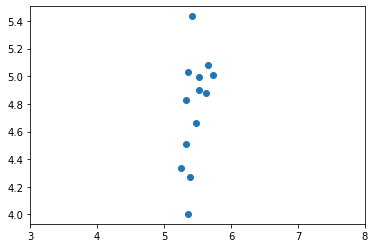

In [38]:
plt.scatter(renorm_act_hard(new_data[:,-1]).detach().numpy(),renorm_pred_hard(comp,load).detach().numpy())
plt.xlim([3,8])

In [114]:
dd  = pd.read_csv('/Users/sajid/Desktop/PINN_HARDNESS.csv')

In [128]:
load = dd.iloc[:,-2]

In [129]:
H_act = dd.iloc[:,-1]

In [130]:
c1=0.1863
c2=4.0740
p = load.to_numpy()

In [131]:
H_pred = c1/(2*p) +c2 +(np.sqrt((c1**2) +(4*c2*c1*p)))/(2*p)

In [132]:
#  import numpy as np
# p = np.arange(1,49,1)

In [133]:
H_act = H_act.to_numpy()

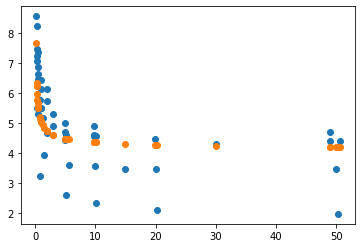

In [134]:
plt.scatter(p,H_act)
plt.scatter(p,H_pred)
plt.show()

In [ ]:
data  = pd.read_csv('/Users/sajid/Desktop/el_data.csv')

In [ ]:
# from google.colab import files
# uploaded = files.upload()

df  = pd.read_csv('/Users/sajid/Desktop/pred.csv')

In [ ]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
X = torch.tensor(x.to_numpy() ,dtype = torch.float32)

In [ ]:
yy = model(X)

In [ ]:
yy = yy.detach().numpy()

In [ ]:
xx  = (x.iloc[:,-1].to_numpy())

In [ ]:
type(xx)

In [ ]:
#train_dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train, y_train), batch_size=64,shuffle=True)  
#test_dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=64,shuffle=False ) 

In [ ]:
n_inputs = 11
n_outputs = 1

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, 
#           batch_size=10, epochs=30, shuffle=True, verbose=2)

In [ ]:
# def get_model(n_inputs, n_outputs):
#     model = Sequential()
#     model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(n_outputs))
    
#     return model

In [ ]:
# p = x_train.iloc[:,-1]
# ## Defining loss function
# def loss(y_pred, y_true,c1,c2,p):
#     return (y_pred - y_true)**(2).mean()+y_pred-(c1/4*P)+c2+(sqrt(c1**2+4*c1*c2*p))/2*P

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, 
#           batch_size=10, epochs=30, shuffle=True, verbose=2)

In [ ]:
### Initializing weight and bias

# initialization
# W = [np.random.randn(input, h1), np.random.randn(h1,nclass)]
# b = [np.random.randn(h1), np.random.randn(nclass)]


In [ ]:
# ## Defining loss function
# def loss(y_pred, y_true):
#     return (y_pred - y_true)**(2).mean()

In [ ]:
# num_epochs = 300
# ntrain = 418
# ntest = 110
# ep_train_acc =  [] 
# ep_test_acc = [] 
# ep_train_loss = []
# ep_test_loss = []
# tt = []

# # Train the model

# for epoch in range(num_epochs):
#     t1 = time.time()
#     train_loss =0
#     train_acc = 0
#     for x,y in zip(x_train,y_train):  
     
#         # Forward pass
#         out = model(x)
#         loss = loss(y_pred, y_true,c1,c2,p)
#         train_loss += loss.item()
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         train_acc += torch.sum(torch.argmax(out, dim=1)== y) 
#     model.eval()

In [ ]:
print(y_pred[0])

In [ ]:
#Defining Model

## Forward Pass
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):

        super(NeuralNetwork, self).__init__()
        self.relu = nn.ReLU()
#         self.sigm = nn.Sigmoid()
        self.lin1 = nn.Linear(input_size, hidden1_size)
        self.lin2 = nn.Linear(hidden1_size, hidden2_size)
        self.lin3 = nn.Linear(hidden2_size, num_classes)
        self.c1 = nn.Parameter(torch.randn(1),requires_grad=True)
        self.c2 = nn.Parameter(torch.randn(1),requires_grad=True)
        
    def forward(self, x):

        out = self.lin1(x)
        out = self.relu(out)
        out = self.lin2(out)
        out = self.relu(out)
        out = self.lin3(out)
        
      
        return out
    def loss(self,y_pred, y_true,p):
        l_data = (y_pred - y_true)**(2)
        t1 = (self.c1/4*p) + self.c2
        t2 = torch.sqrt(self.c1**2 + 4* self.c1*self.c2)/ (2*p)
        l_p = (y_true - (t1+ t2))**2
#         l_p = (y_pred-(self.c1/4*p)+self.c2+(torch.sqrt(self.c1**2+4*self.c1*self.c2*p))/2*p)**2
        return  l_data +l_p 
    


In [ ]:
input = 11 # (38*11)
h1 = 5
h2 = 5
nclass =1   # (11*1)

model = NeuralNetwork(input, h1, h2, nclass)
## Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001 , weight_decay = 1e-3)  
print(model)

In [ ]:
# ### Initializing weight and bias

# # initialization
# W = [np.random.randn(input, h1), np.random.randn(h1,h2)]
# b = [np.random.randn(h1), np.random.randn(h2)]


In [ ]:
# ## Optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001 , weight_decay = 1e-3)  

In [ ]:
# p = x_train.iloc[:,-1]

In [ ]:
# p = x_train.iloc[:,-1]
# ## Defining loss function
# # def loss(y_pred, y_true,c1,c2,p):
# #     return (y_pred - y_true)**(2).mean()+y_pred-(c1/4*P)+c2+(sqrt(c1**2+4*c1*c2*p))/2*P

## MODEL TRAINING

In [ ]:
xx = torch.tensor(x_train.to_numpy(), dtype = torch.float32)
yy = torch.tensor(y_train.to_numpy() ,dtype = torch.float32)

In [ ]:
print(xx.shape, yy.shape)

In [ ]:
xx[:,-1]== 0

In [ ]:
## Backpropogation
num_epochs = 50
ntrain = 38
ntest = 10
ep_train_acc =  [] 
ep_test_acc = [] 
ep_train_loss = []
ep_test_loss = []
tt = []

# Train the model

for epoch in range(num_epochs):
    t1 = time.time()
    train_loss =0
    train_acc = 0
    
    for x,y in zip(xx,yy): 
        optimizer.zero_grad()
        p = x[-1]
#         print(p)
       
        y_pred = model(x)
        loss = model.loss(y_pred[0], y,p)
#         print(loss.item())

        train_loss += loss.item()
        
#         # Backward and optimize
        
        train_loss += loss.item()
#         loss.backward()
        print(loss.item())
        optimizer.step()
#     print(train_loss)
    ep_train_loss.append(train_loss/ntrain)
    print(ep_train_loss[-1])

        

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# with torch.no_grad():
#     test_loss = 0
#     test_acc = 0
#     for x, y in zip(x_train,y_train):
#         out = model(x)
#         loss = loss(y_pred, y_true,c1,c2,p)
#         train_loss += loss.item()
#         test_loss += loss.item()
#         test_acc += torch.sum(torch.argmax(out, dim=1)== y)
#     t2 = time.time() 

#     tt.append(t2-t1)
        
        
#     ep_train_loss.append(train_loss/ntrain)
#     ep_test_loss.append(test_loss/ntest)
#     ep_train_acc.append(train_acc/ntrain)
#     ep_test_acc.append(test_acc/ntest)

# z = sum(tt)
# print(f'total time {z}' )


In [ ]:
model.c1

model.c2

In [ ]:
model.c2

## PLOTTING

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
epoch = [i for i in range(300)]
fig, ax = plt.subplots(figsize=[12,5])
plt.subplot(121)
plt.xlabel('Epoch')
plt.ylabel('LOSS')
plt.plot(epoch,ep_train_loss)
plt.plot(epoch,ep_test_loss)
plt.legend(["Train_loss", "Test_loss"], loc='upper right')
plt.subplot(122)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epoch,ep_train_acc)
plt.plot(epoch,ep_test_acc)
plt.legend(["Train_accuracy", "Test_accuracy"],loc='lower right')
plt.tight_layout()
plt.show()